# Pymaceuticals Inc.
---

### Analysis

-  mouse weight and average tumor volume for the Capomulin regimen have a positive relationship bas on the high correlation coeffecient between the two

- Capomulin and Ramicane have higher efficacy in treating tumors
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Complete_data= mouse_metadata.merge(study_results, how = "left" , on="Mouse ID")
# Display the data table for preview
Complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_quan = Complete_data["Mouse ID"].nunique()
mice_quan

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_data = Complete_data[Complete_data.duplicated (["Mouse ID", "Timepoint"])]["Mouse ID"].unique()
clean_data




array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_ID = Complete_data.loc[Complete_data["Mouse ID"] == 'g989', :]
dupe_ID

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = Complete_data.drop(dupe_ID.index)
#clean_df = clean_df [clean_df["Mouse ID"] != 'g989', :]
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = clean_df["Mouse ID"].nunique()
number_of_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

Tumor_mean = clean_df.groupby( by= ["Drug Regimen"]).mean()
Tumor_median =  clean_df.groupby( by= ["Drug Regimen"]).median()
Tumor_var = clean_df.groupby( by= ["Drug Regimen"]).var()
Tumor_std = clean_df.groupby( by= ["Drug Regimen"]).std()
Tumor_SEM = clean_df.groupby( by= ["Drug Regimen"]).sem()

Summary_df = pd.DataFrame ({"Tumor Mean" : Tumor_mean["Tumor Volume (mm3)"],
              "Median Tumor Volume" : Tumor_median["Tumor Volume (mm3)"],
              "Tumor Volume Variance" : Tumor_var["Tumor Volume (mm3)"],
             "Tumor Volume Std. Dev." : Tumor_std["Tumor Volume (mm3)"],
            "Tumor Volume Std. Err." : Tumor_SEM["Tumor Volume (mm3)"]})

Summary_df

,Tumor Mean,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_df = Complete_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

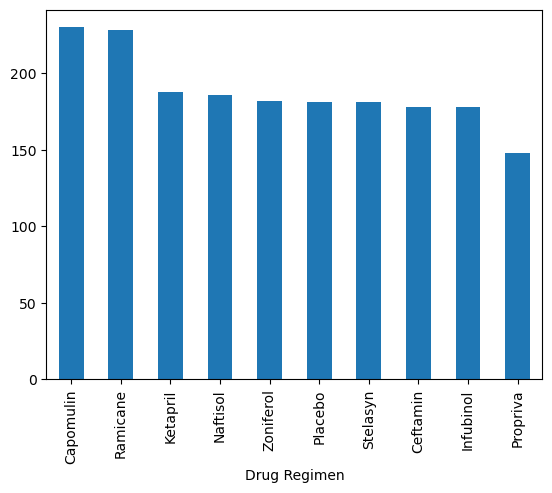

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bars = clean_df.groupby( by= ["Drug Regimen"])["Timepoint"].count().sort_values(ascending = False)
bars
panda_plot = bars.plot.bar()



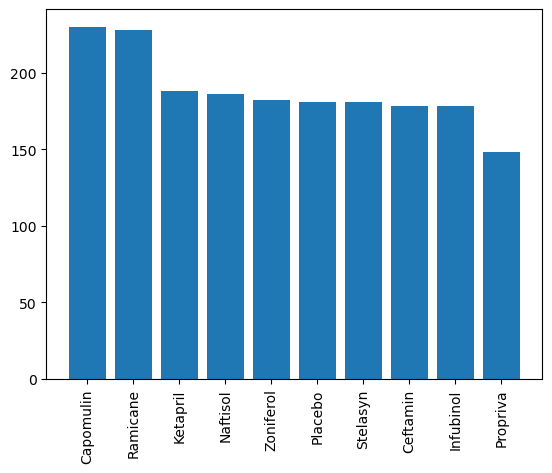

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

pybars = plt.bar(bars.index.values, bars)
plt.xticks(rotation= 90)
plt.show()

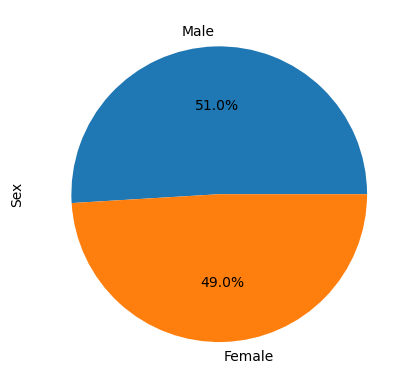

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = clean_df["Sex"].value_counts()
counts
plot = counts.plot.pie(y=counts.index.values, autopct="%1.1f%%")


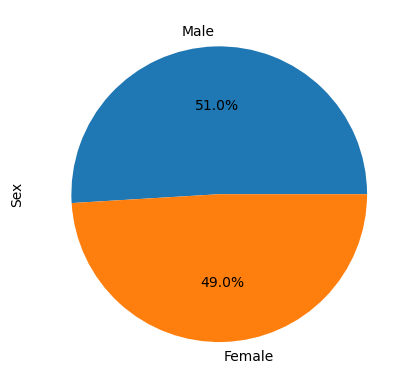

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = clean_df["Sex"].value_counts()
labels = counts.index
size = counts.values
#pycounts = [labels = labels, sizes = size]
plt.pie(size, labels=labels, autopct='%0.1f%%')
plt.ylabel("Sex")
plt.show()


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
latest_vol = clean_df.groupby (by = ["Drug Regimen", "Mouse ID"]).max()["Timepoint"].reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_merged_df = pd.merge(latest_vol,clean_df,how='left')
last_merged_df

,Drug Regimen,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,45,Female,9,22,38.982878,2
1,Capomulin,b742,45,Male,7,21,38.939633,0
2,Capomulin,f966,20,Male,16,17,30.485985,0
3,Capomulin,g288,45,Male,3,19,37.074024,1
4,Capomulin,g316,45,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
243,Zoniferol,q633,45,Male,12,25,70.827796,2
244,Zoniferol,s337,45,Male,14,27,62.109651,4
245,Zoniferol,w140,5,Female,19,30,47.717952,0
246,Zoniferol,w575,45,Female,16,28,68.401286,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    outliers = []
    codey = last_merged_df.loc[last_merged_df["Drug Regimen"]==treatment]["Tumor Volume (mm3)"]
    quartiles = last_merged_df.loc[last_merged_df["Drug Regimen"]==treatment]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers.append(codey[(codey < lower_bound).values | (codey > upper_bound)].values)
    print(treatment + "'s potential outliers:" + str(outliers))
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin's potential outliers:[array([], dtype=float64)]
Ramicane's potential outliers:[array([], dtype=float64)]
Infubinol's potential outliers:[array([36.3213458])]
Ceftamin's potential outliers:[array([], dtype=float64)]


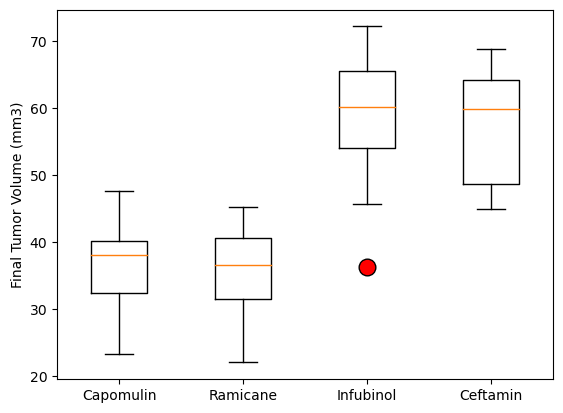

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flier = dict(marker='o', markerfacecolor = 'r', markersize=12, markeredgecolor='black')
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
var1 = last_merged_df.loc[last_merged_df["Drug Regimen"]==treatments[0]]["Tumor Volume (mm3)"]
var2 = last_merged_df.loc[last_merged_df["Drug Regimen"]==treatments[1]]["Tumor Volume (mm3)"]
var3 = last_merged_df.loc[last_merged_df["Drug Regimen"]==treatments[2]]["Tumor Volume (mm3)"]
var4 = last_merged_df.loc[last_merged_df["Drug Regimen"]==treatments[3]]["Tumor Volume (mm3)"]
columns = [var1,var2,var3,var4]
ax1.boxplot(columns,flierprops=flier)
plt.xticks([1, 2, 3, 4], [treatments[0],treatments[1],treatments[2],treatments[3]])
plt.show()


## Line and Scatter Plots

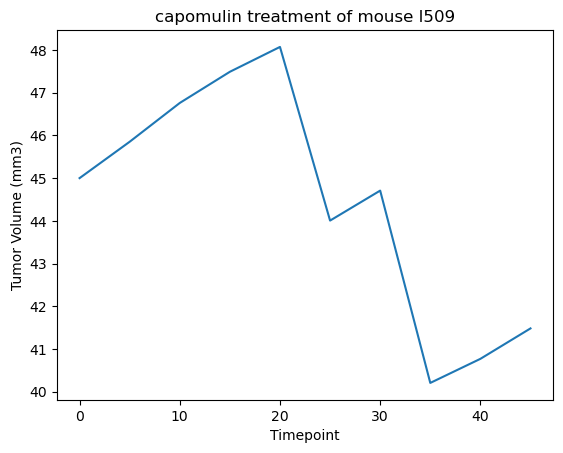

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_data = clean_df.loc [clean_df["Mouse ID"] == 'l509', :]
#mouse_data_df = mouse_data.groupby (["Mouse ID"])#["Timepoint"]["Tumor Volume (mm3)"]
mouse_data
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.title('capomulin treatment of mouse l509')
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()



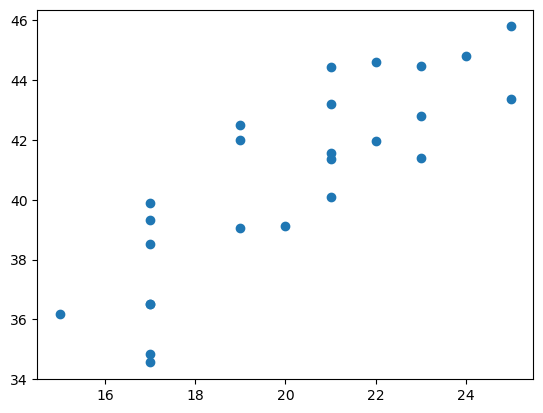

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
regimen_data = clean_df.loc [clean_df["Drug Regimen"] == "Capomulin", :]
regimen_data
regimen_dataavg = regimen_data.groupby (by= "Mouse ID").mean()
regimen_dataavg
plt.scatter (regimen_dataavg["Weight (g)"], regimen_dataavg["Tumor Volume (mm3)"])
plt.show()


## Correlation and Regression

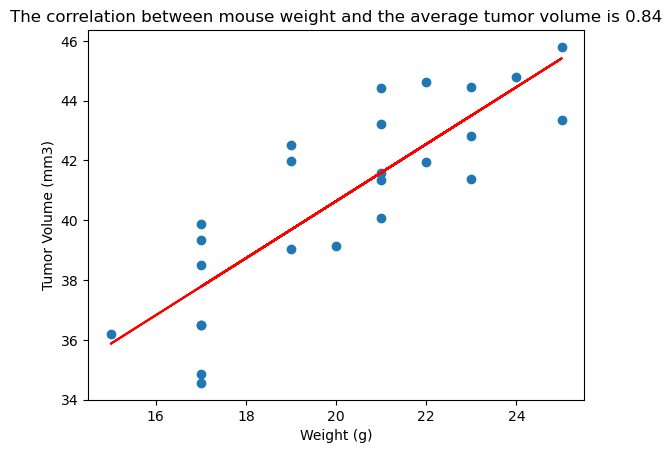

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = regimen_dataavg["Weight (g)"]
y_values = regimen_dataavg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

coef = st.pearsonr (x_values, y_values).statistic
coeff ='{:.2f}'.format(coef)
plt.title ("The correlation between mouse weight and the average tumor volume is "+ str(coeff))
plt.show()
